Saving عکس اینتروی جبر.png to عکس اینتروی جبر.png


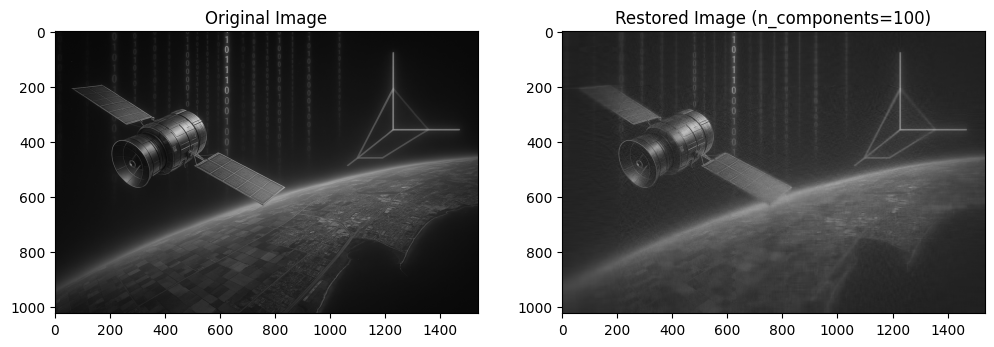

Explained variance with 100 components: 91.67%


In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io, color
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))
img = io.imread(filename)

if len(img.shape) == 3:
    img = color.rgb2gray(img)

rows, cols = img.shape
img_centered = img - np.mean(img)

pca = PCA()
pca.fit(img_centered)

n_components = 100
pca_reduced = PCA(n_components=n_components)
img_reduced = pca_reduced.fit_transform(img_centered)
img_restored = pca_reduced.inverse_transform(img_reduced)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_restored, cmap='gray')
plt.title(f'Restored Image (n_components={n_components})')

plt.show()

explained_variance = np.sum(pca_reduced.explained_variance_ratio_)
print(f"Explained variance with {n_components} components: {explained_variance:.2%}")